In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\h.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['total_rooms']=df['total_rooms'].astype(int)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df['total_bedrooms']=df['total_bedrooms'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int32  
 4   total_bedrooms      20640 non-null  int32  
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(7), int32(2), object(1)
memory usage: 1.4+ MB
None


In [5]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
df1=pd.get_dummies(df['ocean_proximity'],prefix='ocean_proximity')
df=pd.concat([df,df1],axis=1)
df=df.rename(columns={'ocean_proximity_<1H OCEAN':'In_ocean','ocean_proximity_INLAND':'In_land','ocean_proximity_NEAR BAY':'Near_bay','ocean_proximity_NEAR OCEAN':'Near_ocean','ocean_proximity_ISLAND':'Island'})
df=df.drop(columns='ocean_proximity',axis=1)
df=df.reset_index(drop=True)
df['In_ocean']=df['In_ocean'].astype(int)
df['In_land']=df['In_land'].astype(int)
df['Island']=df['Island'].astype(int)
df['Near_bay']=df['Near_bay'].astype(int)
df['Near_ocean']=df['Near_ocean'].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,In_ocean,In_land,Island,Near_bay,Near_ocean
0,-122.23,37.88,41.0,880,129,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099,1106,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467,190,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274,235,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627,280,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [7]:
# How many rooms are bedrooms
df['Rooms_whichare_bedrooms']=df['total_rooms']/df['total_bedrooms']
# Rooms per Household
df['Rooms_per_Household']=df['households']/df['total_rooms']

In [8]:
df=df[['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income','In_ocean',
 'In_land',
 'Island',
 'Near_bay',
 'Near_ocean','median_house_value']]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

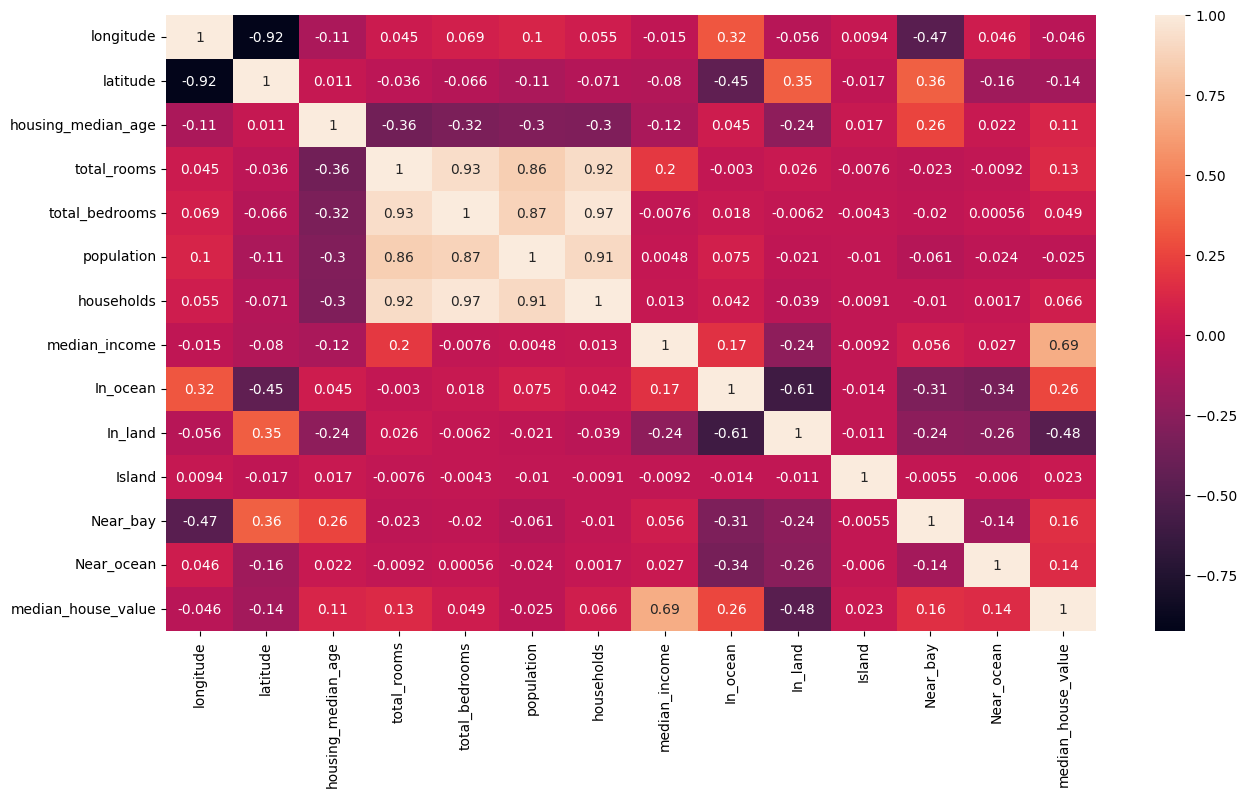

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

In [12]:
x=df.drop(columns='median_house_value')
y=df['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
dt=DecisionTreeRegressor()
path=dt.cost_complexity_pruning_path(x_train,y_train)
alphas=path.ccp_alphas

In [15]:
param={'ccp_alpha':alphas}
ndt= RandomizedSearchCV(dt,param_distributions=param,scoring='r2',cv=10,n_jobs=-1,n_iter=100,random_state=42)
ndt.fit(x_train,y_train)
print(ndt.best_score_)
print(ndt.best_params_)
ba=ndt.best_params_['ccp_alpha']

0.7241116551110974
{'ccp_alpha': 4298646.296764411}


In [16]:
dt = DecisionTreeRegressor(ccp_alpha=ba)
param = {
    'criterion': ['squared_error', 'poisson'],
    'max_depth': list(np.arange(1, 101)),
    'min_samples_split': list(np.arange(2, 101)),
    'min_samples_leaf': list(np.arange(1, 101)),
    'max_features': ['sqrt', 'log2', None]
}
ndt = RandomizedSearchCV(dt, param_distributions=param, scoring='r2', cv=10, n_jobs=-1, n_iter=100, random_state=42)
ndt.fit(x_train, y_train)
print("Best Score (RandomizedSearchCV):", ndt.best_score_)
print("Best Parameters (RandomizedSearchCV):", ndt.best_params_)

Best Score (RandomizedSearchCV): 0.737077453440544
Best Parameters (RandomizedSearchCV): {'min_samples_split': 30, 'min_samples_leaf': 14, 'max_features': None, 'max_depth': 60, 'criterion': 'squared_error'}


In [17]:
ndt=ndt.best_estimator_

In [18]:
pred=ndt.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7521313562933325


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

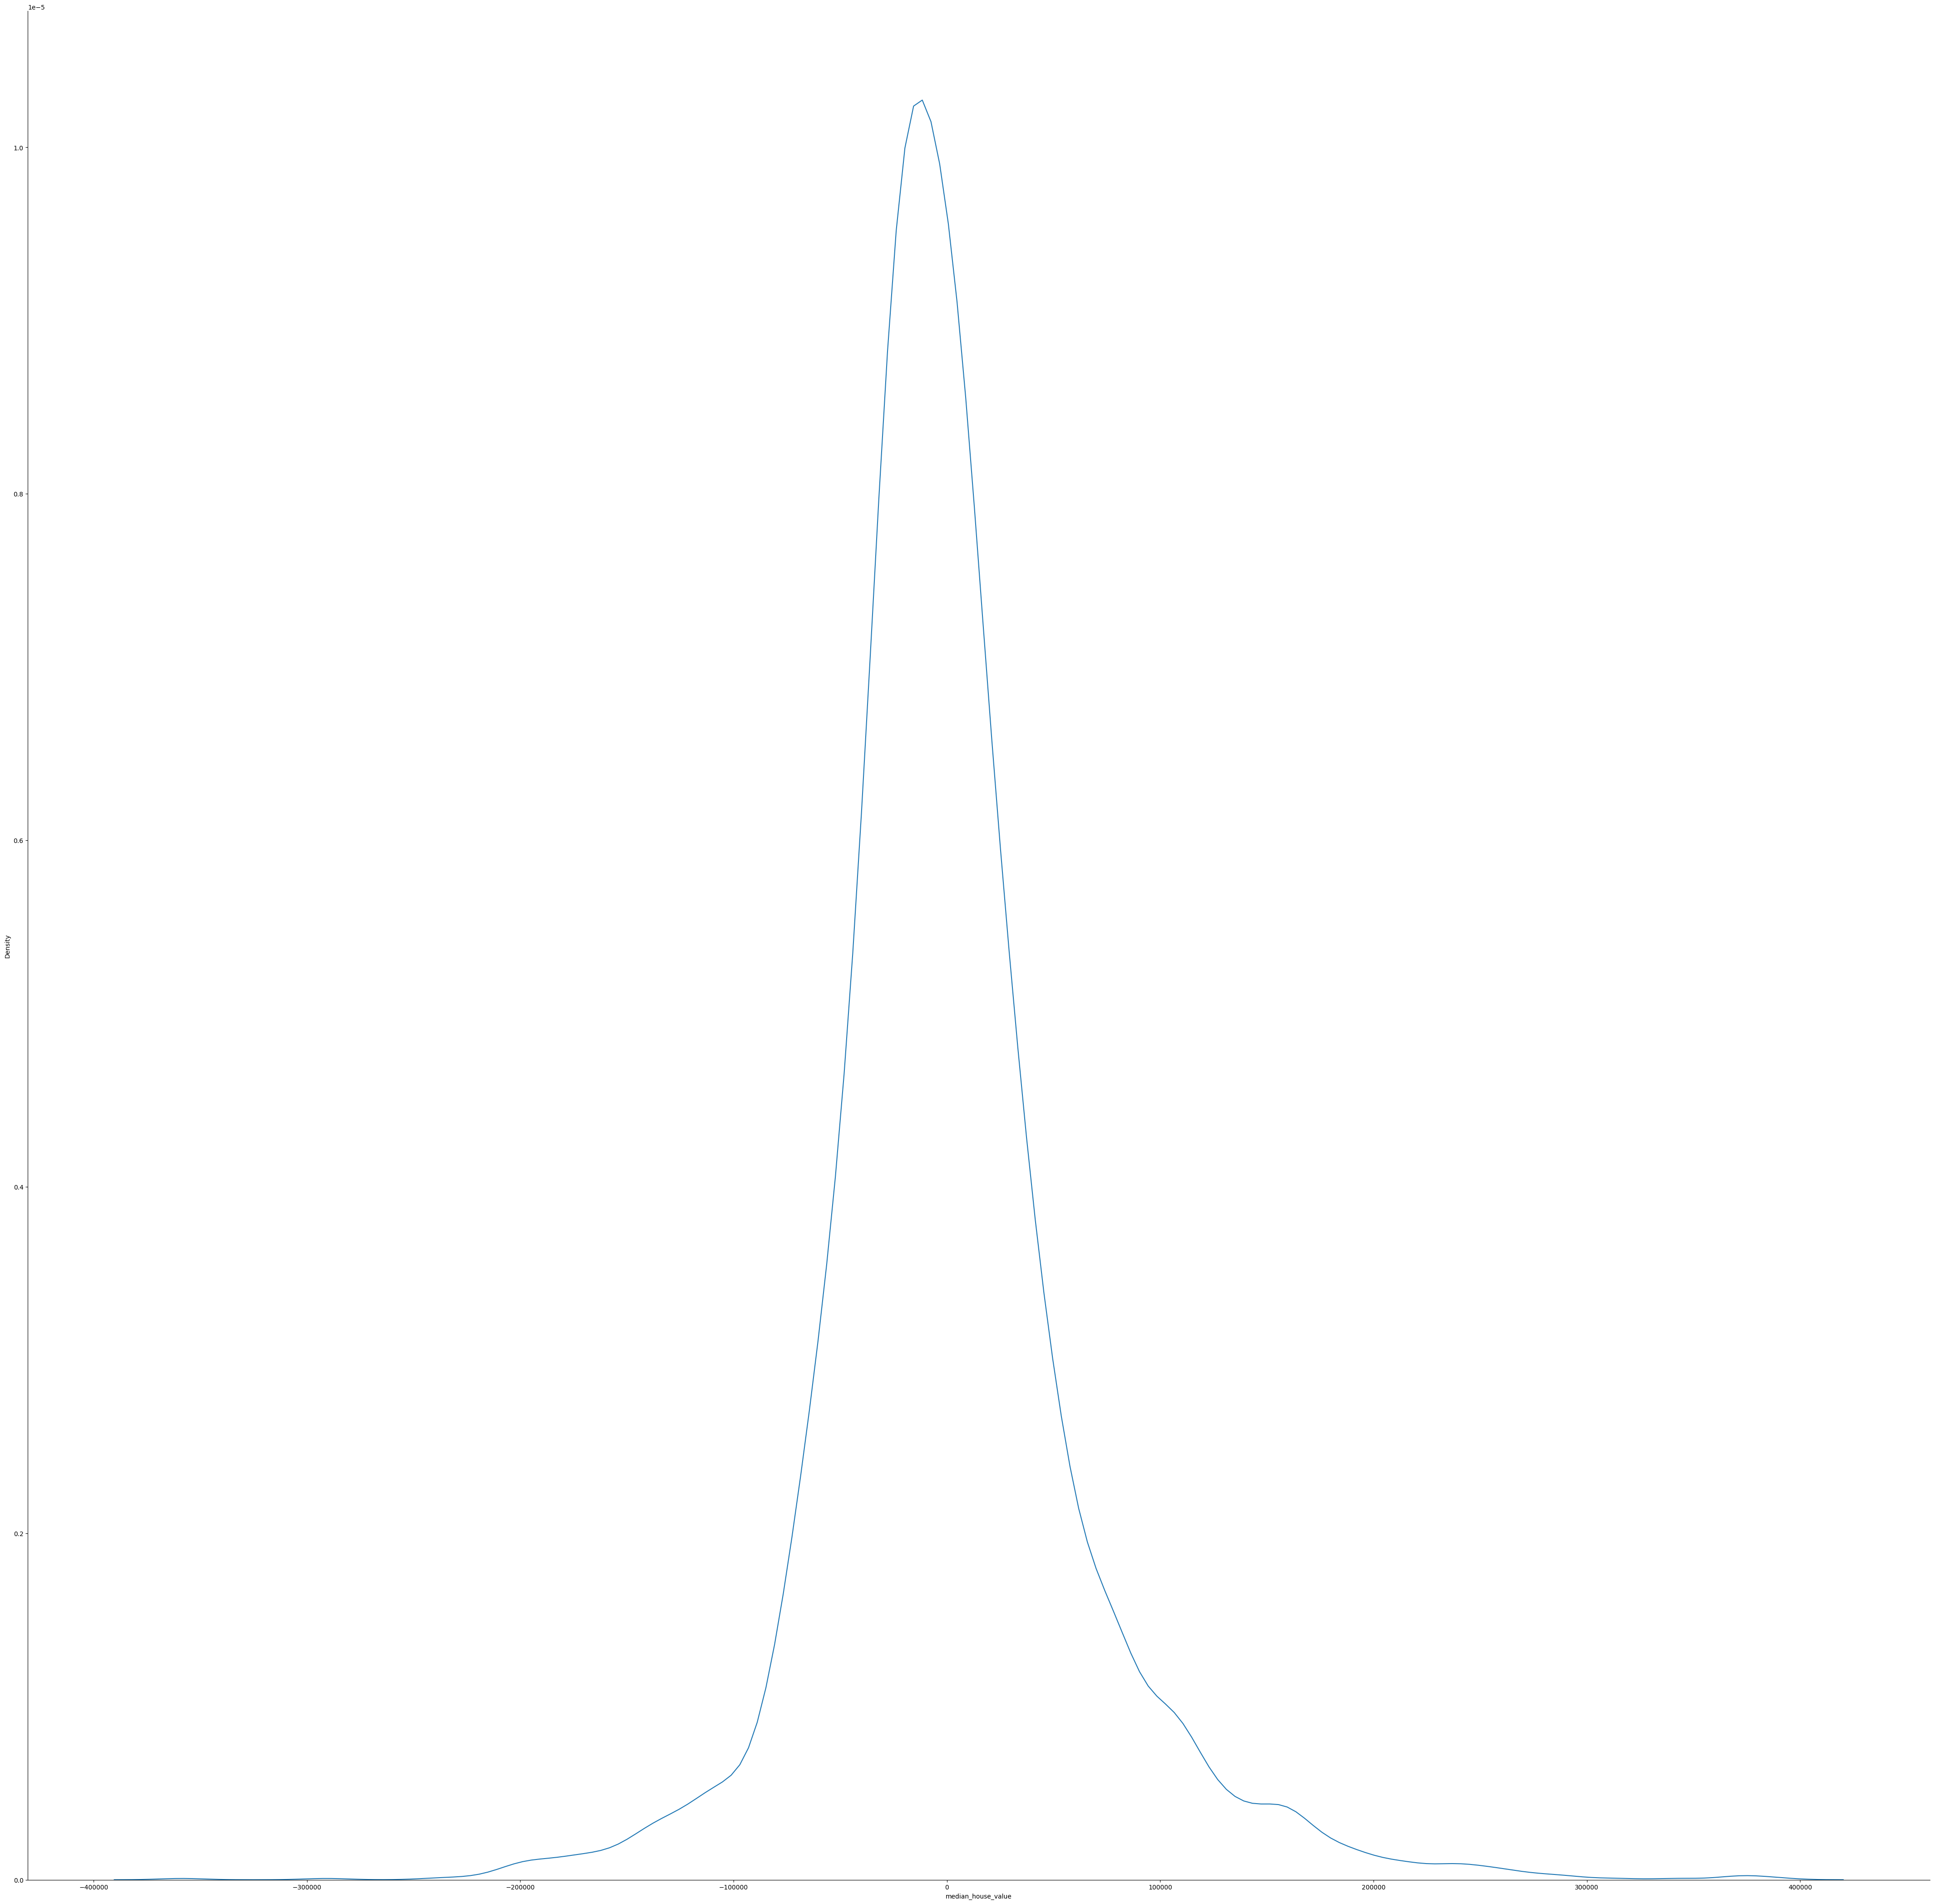

In [38]:
g=sns.displot(y_test-pred,kind='kde')
g.fig.set_size_inches(, 50)
plt.show()